## b) Interpolação por trazadores cúbicos (*cubic splines*)


Permite encontrar valores intermediarios em um conjunto de dados usando polinomios cubicos.

Assuma que temos $n+1$ pontos, $x_0, x_1,..., x_n$, tal que $x_0 < x_1 <...<  x_n$.

Uma função *spline*, $s$ de ordem $k$, com $n+1$ pontos é definida como:  

* Em cada sub-intervalo $[ x_{i-1}, x_i )$, $s$ é um polinomio de grau $k$.

* $s$ têm $k-1$ derivadas continuas no intervalo total $[x_{0}, x_n]$.


A função *spline* mais comum é aquela com $k=3$, ou *spline* cúbico.

Se alem dos $n+1$  pontos temos os valores da função $y_0 = f(x_0), y_1 = f(x_1), ..., y_n = f(x_n)$.
Por definição, os polinomios devem interpolar o mesmo ponto:

$$
s_{i-1}(x_i) = y_i = s_i(x_i) \;,
$$

Com $0\le i \le n-1$. No total temos $n$ polinomios do tipo:

$$
s_{i}(x) = a_{i0} + a_{i1}x + a_{i2} x^2 + a_{i3} x^3 \;,
$$

o que implica que teremos ${\bf 4n}$ coeficientes para determinar. Cada sub-intervalo possui duas
condições:

$$
y_i = s(x_i) \; \;{\rm e} \; \;   y_{i+1} = s(x_{i+1}) \;,
$$

que devem ser satisfeitas. Daqui temos $2n$ condições.

Já que $s'$ e $s''$ são continuas, temos:

$$
s'_{i-1}(x_i) = s'_i(x_i) \;\;, {\rm e }\;\; s''_{i-1}(x_i) = s''_i(x_i)
$$

proporcionando $n-1$ e $n-1$ condições, respetivamente. No total temos $4n$ coeficientes
e $4n-2$ equações, precisamos ainda determinar $2$ graus de liberdade.

Partindo da ultima equação definimos dois valores para a segunda derivada:

$$
s''_{i}(x_i) = f_i \;\;, {\rm e }\;\; s''_{i}(x_{i+1}) = f_{i+1}
$$


Uma linha reta entre os pontos $f_i$ e $f_{i+1}$ é:

$$
s''_{i}(x) = \frac{f_i}{x_{i+1} - x_i}(x_{i+1} - x) + \frac{f_{i+1}}{x_{i+1} - x_i}(x - x_i)
$$

e integrando duas vezes temos:

$$
s_i(x) = \frac{f_i}{6(x_{i+1}-x_i)}(x_{i+1}-x)^3+
               \frac{f_{i+1}}{6(x_{i+1}-x_i)}(x-x_i)^3
             +c(x-x_i)+d(x_{i+1}-x).
$$

Usando as condições  $s_i(x_i)=y_i$ e $s_i(x_{i+1})=y_{i+1}$ 
podemos de fato determinar as constantes $c$ e $d$ o que resulta em


\begin{eqnarray} 
s_i(x) &=& \frac{f_i}{6(x_{i+1}-x_i)}(x_{i+1}-x)^3+
               \frac{f_{i+1}}{6(x_{i+1}-x_i)}(x-x_i)^3 \\\nonumber
       &+& (\frac{y_{i+1}}{x_{i+1}-x_i}-\frac{f_{i+1}(x_{i+1}-x_i)}{6})
              (x-x_i)+
             (\frac{y_{i}}{x_{i+1}-x_i}-\frac{f_{i}(x_{i+1}-x_i)}{6})
             (x_{i+1}-x).
\end{eqnarray}

Mas como determinamos as segundas derivadas $f_i$ e $f_{i+1}$? Usando a condição de continuidade para
a primeira derivada:

$$
s'_{i-1}(x_i) = s'_i(x_i) \;\;,
$$

e fazendo $x=x_i$.  Definindo $h = x_{i+1} - x_i$, obtemos a seguinte expressão:

$$
h_{i-1}f_{i-1}+2(h_{i}+h_{i-1})f_i+h_if_{i+1}=
   \frac{6}{h_i}(y_{i+1}-y_i)-\frac{6}{h_{i-1}}(y_{i}-y_{i-1}),
$$

Finalmente fazemos a mudança de viriável: $u_i = 2(h_i + h_{i-1})$,
$\nu_i = \frac{6}{h_i} (y_{i+1} - y_i) - \frac{6}{h_{i-1}} (y_i - y_{i-1})$,
podemos re-escrever o problema como um conjunto de equações que pode ser resolvido usando
algebra matricial. Para o caso, pela forma da matriz precisamos de um algoritmo que
resolva matrizes tridiagonais.

$$
\begin{bmatrix} u_1 & h_1 &0 &\dots & & & & \\
                                 h_1 & u_2 & h_2 &0 &\dots & & & \\
                                  0   & h_2 & u_3 & h_3 &0 &\dots & & \\
                               \dots& & \dots &\dots &\dots &\dots &\dots & \\
                                 &\dots & & &0 &h_{n-3} &u_{n-2} &h_{n-2} \\
                                 & && & &0 &h_{n-2} &u_{n-1} \end{bmatrix}
   \begin{bmatrix} f_1 \\ 
                          f_2 \\
                          f_3\\
                          \dots \\
                          f_{n-2} \\ 
                          f_{n-1} \end{bmatrix} =
   \begin{bmatrix} v_1 \\ 
                          v_2 \\
                          v_3\\
                          \dots \\
                          v_{n-2}\\
                          v_{n-1} \end{bmatrix}.
$$

Essa matriz resolve um sistema tridiagonal de equações, ou seja, so as 3 diagonais principais tem elementos. Esse sistema pode ser resolvido por substituição. Como sistemas desse tipo aparecem com frequência em problemas numéricos, existem rotinas sofisticadas para resolve-los. 

Uma vez encontradas as segundas derivadas, $f_i$, encontramos os $n$ polinomios substituindo as segundas derivadas na equação para $s_i(x)$.


## Interpolação com `python.scipy`

A biblioteca `scipy` é uma coleção muito completa de rotinas e funções comumente usados na computação científica. Nela podem se encontrar várias formas de fazer interpolação de splines. 

A mais simples é a função `interp1d`. 

* Baseada nos pontos conhecidos, `interp1d`  cria uma função que pode ser avaliada em qualquer ponto dentro do intervalo dos valores conhecidos de $x$. 

* Os pontos de *boundary* podem ser considerados 

* A ordem de interpolação também é determinada como parâmetro



In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
# definimos os pontos
x = np.linspace(0, 10, num=8, endpoint=True)
y = np.cos(-x**2/9.0)

# Generamos a função para interpolação com splines lineares
f1 = interp1d(x, y)
f3 = interp1d(x, y, kind='cubic')

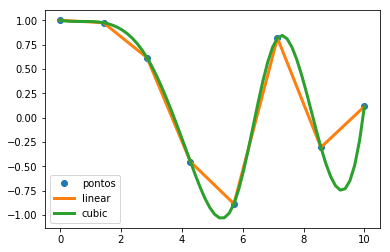

In [7]:
# vamos determinar valores de x no mesmo intervalo, porem em
# pontos intermediarios

xnovo = np.linspace(0,10,64)

# Agora podemos graficar
plt.plot(x,y,'o', label='pontos')
plt.plot(xnovo,f1(xnovo),label='linear',lw=3)
plt.plot(xnovo,f3(xnovo),label='cubic',lw=3)
plt.legend(loc=3)

## Interpolação com splines, usando `splrep`

A interpolação com trazadores, *splines* requer dois passos,

1. Uma representação da curva com `splines`
2. os `splines` são avaliados em qualquer ponto arbitrario

A função `splrep` calcula a representação dos splines a saida é uma tupla que tem $(t,c,k)$, $t$ são so pontos,
$c$ são os coeficientes, e $k$ a ordem.  O parâmetro $s$ especifica quanto a curva vai ser suavizada. O valor padrão de s é $m - \sqrt{(2m)}$, onde $m$ é o número de pontos sendo ajustados. 

**Para não suavizar a curva devemos usar então $s=0$**.

In [11]:
from scipy import interpolate

In [12]:
# A função splrep calcula a representação dos splines
# a saida é uma tupla que tem (t,c,k), t são so pontos 
# c são os coeficientes, e k a ordem

tck = interpolate.splrep(x, y, s=0)

Uma vez que a representação em *splines* foi determinada, podemos calcular pontos interpolados usando a função `splev`.

In [17]:
tck[2]

3

In [18]:
# A função receve como parâmetros os novos valores de x
# uma tupla representando os splines, para o caso tck
# der é a ordem da derivada qu quer ser produzida, 
# der=0: função
# der=1: 1a derivada

ycs = interpolate.splev(xnovo, tck, der=0)
ycs_1der = interpolate.splev(xnovo, tck, der=1)
ycs_2der = interpolate.splev(xnovo, tck, der=2)

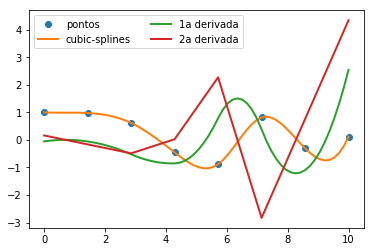

In [19]:
# Agora podemos graficar
plt.plot(x,y,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.plot(xnovo,ycs_1der,label='1a derivada',lw=2)
plt.plot(xnovo,ycs_2der,label='2a derivada',lw=2)
plt.legend(loc=2,ncol=2)

## Atividade

1. Vamos interpolar a função de Runge, $f(x) = \frac{1}{1+25x^2}$, num conjunto de $n$ nós regularmente espaçados

$$
x_k =  \frac{2k}{n} - 1, \; \; k = 0,1,2, \ldots , n
$$

a. Considere $n=4$ e calcule os polinomios de intepolação de Lagrange $P_N (x)$ para 41 pontos regularmente espaçados.

b. Calcule o erro específico no cálculo usando $\epsilon = \frac{f(x) - P_N(x)}{f(x)}$. 

c. Aumente o número de pontos conhecidos de 4 para 6, para 8 e finalmente para 11, descreva o resultado.  Aumentar o número de pontos melhora o resultado?

d. Agora utilize *splines* cúbicos e calcule o polinomio de interpolação $S(x)$ para 41 pontos regularmente espaçados. Os pontos conhecidos iniciais são  4 tal como no ponto 1. Repita para 6 e para 8 pontos igualmente espaçados. 

e. Calcule o erro, $\epsilon = \frac{f(x) - S(x)}{f(x)}$. O aumento de número de pontos conhecidos melhora a interpolação?

f. Pode disser alguma coisa sobre qual método é melhor para interpolar a função de Runge? (pesquise rapidamente e descreva o problema com a interpolaçao polinomial para a função Runge).

2. **Equação de Lagrange**


a.  Escreva um algoritmo para interpolação polinomial usando a equação de Lagrange. 

b.  Considere quatro pontos internos entre 0 e 1 da função $\exp(x^2)$. Usando esses pontos realize a interpolação para 32 pontos internos. 

c.  Realize a mesma interpolação utilizando o algoritmo de Leville. 

d.  Compare o erro relativo para os dois métodos no ponto $x=0.5$.
